# CPSC 330 - Applied Machine Learning 

## Homework 5: Evaluation metrics
### Associated lectures: Lectures 9, 10 

**Due date: Tuesday, June 07, 2022 at 18:00**

## Imports

In [1]:
import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tests_hw5
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

## Instructions 
<hr>
rubric={points:3}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2022s/blob/master/docs/homework_instructions.md).

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).

<br><br>

## Exercise 1: Precision, recall, and f1 score by hand <a name="1"></a>
<hr>

Consider the problem of predicting whether a patient has a disease or not. Below are confusion matrices of two machine learning models: Model A and Model B.

- Model A confusion matrix

In [2]:
cm_A = pd.DataFrame(
    [[3, 10],
     [1, 106]],
    columns=["Predicted disease", "Predicted no disease"],
    index=["Actual disease", "Actual no disease"])

cm_A

,Predicted disease,Predicted no disease
Actual disease,3,10
Actual no disease,1,106


- Model B confusion matrix

In [3]:
cm_B = pd.DataFrame(
    [[8, 5],
     [12, 95]],
    columns=["Predicted disease", "Predicted no disease"],
    index=["Actual disease", "Actual no disease"])

cm_B

,Predicted disease,Predicted no disease
Actual disease,8,5
Actual no disease,12,95


### 1.1 Positive vs. negative class 
rubric={points:2}

**Your tasks:**

Precision, recall, and f1 score depend upon which class is considered "positive", that is the thing you wish to find. In the example above, which class is likely to be the "positive" class? Why? 

The class "has a disease"  is likely to be the "positive" class because the model is trying to predict whether a patient has disease or not. Therefore, it makes sense that class "has a diseases" is considered " as positive". 

<br><br>

### 1.2 Accuracy
rubric={points:2}

**Your tasks:**

Calculate accuracies for Model A and Model B. 

We'll store all metrics associated with Model A and Model B in the `results_dict` below. 

In [4]:
results_dict = {"A": {}, "B": {}}

In [5]:
results_dict["A"]["accuracy"] = 109/(3+10+1+106)
results_dict["B"]["accuracy"] = 103/(8+5+12+95)

In [6]:
assert tests_hw5.ex1_2_1(
    results_dict["A"]["accuracy"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [7]:
assert tests_hw5.ex1_2_2(
    results_dict["B"]["accuracy"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [8]:
pd.DataFrame(results_dict)

,A,B
accuracy,0.908333,0.858333


<br><br>

### 1.3 Which model would you pick? 
rubric={points:1}

**Your tasks:**

Which model would you pick simply based on the accuracy metric? 

Based on the accuracy metric, we would choose A because it has a higher accuracy score than B.

<br><br>

### 1.4 Precision, recall, f1-score
rubric={points:6}

**Your tasks:**

1. Calculate precision, recall, f1-score for Model A and Model B manually, without calling `scikit-learn` functions.

In [9]:
results_dict["A"]["precision"] = 3/4
results_dict["B"]["precision"] = 8/20
results_dict["A"]["recall"] = 3/13
results_dict["B"]["recall"] = 8/13
results_dict["A"]["f1"] = 2*(((3/4)*(3/13))/((3/4)+(3/13)))
results_dict["B"]["f1"] = 2*(((8/20)*(8/13))/((8/20)+(8/13)))

In [10]:
assert tests_hw5.ex1_4_1(
    results_dict["A"]["precision"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [11]:
assert tests_hw5.ex1_4_2(
    results_dict["B"]["precision"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [12]:
assert tests_hw5.ex1_4_3(
    results_dict["A"]["recall"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [13]:
assert tests_hw5.ex1_4_4(
    results_dict["B"]["recall"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [14]:
assert tests_hw5.ex1_4_5(
    results_dict["A"]["f1"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [15]:
assert tests_hw5.ex1_4_6(
    results_dict["B"]["f1"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


Show the dataframe with all results. 

In [16]:
pd.DataFrame(results_dict)

,A,B
accuracy,0.908333,0.858333
precision,0.750000,0.400000
recall,0.230769,0.615385
f1,0.352941,0.484848


In [17]:
pd.DataFrame(results_dict)

,A,B
accuracy,0.908333,0.858333
precision,0.750000,0.400000
recall,0.230769,0.615385
f1,0.352941,0.484848


<br><br>

### 1.5 Discussion
rubric={points:4}

**Your tasks:**
1. Which metric is more informative in this problem? Why? 
2. Which model would you pick based on this information? 

1. The confusion matrix is more informative in this problem because we are having imbalanced class. It would be more important to predict people who have diseases than people who don't. In this case, we should be looking at the recall score. Model B has a higher recall score this means it can predict more positive classes than Model A which better serve the purpose of predicting whether a patient has diseases or not.
2.  Model B will be a better choice because it has a significant higher recall score than Model A.

<br><br>

### (Optional) 1.6 
rubric={points:1}

**Your tasks:**

Provide 4 to 5 example classification datasets (with links) where accuracy metric would be misleading. Discuss which evaluation metric would be more appropriate for each dataset. You may consider datasets we have used in this course so far. You could also look up datasets on Kaggle. 

Accuracy metrics can misleading from datasets that are highly imbalanced. Following the link https://www.kaggle.com/general/46744, it lists a multitude of unbalanced datasets: https://www.kaggle.com/datasets/nih-chest-xrays/sample, https://www.kaggle.com/datasets/uciml/bioassay-datasets, https://archive.ics.uci.edu/ml/datasets/breast+cancer, and https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud (these were double checked and confirmed to be imbalanced). Most of these datasets are classifications for which missing a true result would have negative consequences. As such, a better performance metric would be recall for all datasets.

<br><br><br><br>

### Exercise 2: Classification evaluation metrics using `sklearn` <a name="2"></a>
<hr>

In general, when a dataset is imbalanced, accuracy does not provide the whole story. In class, we looked at credit card fraud dataset which is a classic example of an imbalanced dataset. 

Another example is customer churn datasets. [Customer churn](https://en.wikipedia.org/wiki/Customer_attrition) refers to the notion of customers leaving a subscription service like Netflix. In this exercise, we will try to predict customer churn in a dataset where most of the customers stay with the service and a small minority cancel their subscription. To start, please download the [Kaggle telecom customer churn dataset](https://www.kaggle.com/becksddf/churn-in-telecoms-dataset). Once you have the data, you should be able to run the following code:

The starter code below reads the data CSV as a pandas dataframe and splits it into 70% train and 30% test. 

Note that `churn` column in the dataset is the target. "True" means the customer left the subscription (churned) and "False" means they stayed.

> Note that for this kind of problem a more appropriate technique is something called survival analysis and we'll be talking about it later in the course. For now, we'll just treat it as a binary classification problem. 

In [18]:
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv", encoding="utf-8")
train_df, test_df = train_test_split(df, test_size=0.3, random_state=123)
train_df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1402,NE,70,415,421-8535,no,no,0,213.4,86,36.28,...,77,17.40,256.6,101,11.55,5.7,4,1.54,1,False
1855,WI,67,510,417-2265,no,no,0,109.1,134,18.55,...,76,12.10,91.2,86,4.10,10.9,5,2.94,2,False
633,NJ,122,415,327-9341,no,yes,34,146.4,104,24.89,...,103,7.62,220.0,91,9.90,15.6,4,4.21,2,False
1483,NV,107,510,419-9688,yes,no,0,234.1,91,39.80,...,105,13.86,282.5,100,12.71,10.0,3,2.70,1,False
2638,HI,105,510,364-8128,no,no,0,125.4,116,21.32,...,95,22.23,241.6,104,10.87,11.4,9,3.08,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,WY,126,408,339-9798,yes,no,0,197.6,126,33.59,...,112,20.95,285.3,104,12.84,12.5,8,3.38,2,False
3089,WV,70,510,348-3777,no,yes,30,143.4,72,24.38,...,92,14.45,127.9,68,5.76,9.4,4,2.54,3,False
1766,NJ,125,415,406-6400,no,no,0,182.3,64,30.99,...,121,11.88,171.6,96,7.72,11.6,7,3.13,2,False
1122,NE,159,415,362-5111,no,no,0,189.1,105,32.15,...,147,20.92,242.0,106,10.89,10.4,5,2.81,1,True


<br><br>

### 2.1 Distribution of target values
rubric={points:4}

**Your tasks:**

Examine the distribution of target values in the train split. Do you see class imbalance? If yes, do we need to deal with it? Why or why not? 

In [19]:
train_df["churn"].value_counts(normalize=True)

False    0.850407
True     0.149593
Name: churn, dtype: float64

We do have class imbalance in the training split. In terms of dealing with it, we must make considerations in the class weighting and use better metrics than accuracy. This way our models don't plateau and fail to predict beyond the baseline.

<br><br>

### (Optional) 2.2 EDA 
rubric={points:1}

**Your tasks:**

Come up with **two** exploratory questions you would like to answer and explore those. Briefly discuss your results in 1-3 sentences.

You are welcome to use `pandas_profiling` (see Lecture 10) but you don't have to.

In [20]:
train_df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000,2333.000000
mean,100.434634,436.324046,8.028290,179.655679,100.567081,30.542015,201.175782,99.885555,17.100210,201.211745,99.988856,9.054591,10.269567,4.503215,2.773365,1.551650
std,39.642470,41.854200,13.665229,54.546284,20.202414,9.272847,50.449386,19.788878,4.288194,50.888058,19.406455,2.290012,2.777601,2.507555,0.749929,1.328702
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.400000,87.000000,24.380000,167.300000,87.000000,14.220000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.200000,101.000000,30.460000,202.400000,100.000000,17.200000,201.600000,100.000000,9.070000,10.400000,4.000000,2.810000,1.000000
75%,127.000000,415.000000,19.000000,216.300000,114.000000,36.770000,236.000000,113.000000,20.060000,236.600000,113.000000,10.650000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,354.200000,168.000000,30.110000,377.500000,164.000000,16.990000,20.000000,20.000000,5.400000,9.000000


In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 1402 to 1346
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   2333 non-null   object 
 1   account length          2333 non-null   int64  
 2   area code               2333 non-null   int64  
 3   phone number            2333 non-null   object 
 4   international plan      2333 non-null   object 
 5   voice mail plan         2333 non-null   object 
 6   number vmail messages   2333 non-null   int64  
 7   total day minutes       2333 non-null   float64
 8   total day calls         2333 non-null   int64  
 9   total day charge        2333 non-null   float64
 10  total eve minutes       2333 non-null   float64
 11  total eve calls         2333 non-null   int64  
 12  total eve charge        2333 non-null   float64
 13  total night minutes     2333 non-null   float64
 14  total night calls       2333 non-null

Do we need to impute the features? From the above we can see that all columns are dense and have no null/missing values. 

Do we need to scale the numeric features? Some features can use scaling such as account length, number vmail messages, all total calls count features, and customer service calls. Beyond that, I would be wary of scaling the time-based features as well as the currency-based features.

<br><br>

### 2.3 Column transformer 
rubric={points:10}

The code below creates `X_train`, `y_train`, `X_test`, `y_test` for you. 
In preparation for building a classifier, set up a `ColumnTransformer` that performs whatever feature transformations you deem sensible. This can include dropping features if you think they are not helpful. Remember that by default `ColumnTransformer` will drop any columns that aren't accounted for when it's created.

In each case, briefly explain your rationale with 1-2 sentences. You do not need an explanation for every feature, but for every group of features that are being transformed the same way. For example, "I am doing transformation X to the following categorical features: `a`, `b`, `c` because of reason Y," etc.

In [22]:
X_train = train_df.drop(columns=["churn"])
X_test = test_df.drop(columns=["churn"])

y_train = train_df["churn"]
y_test = test_df["churn"]

categorical_features = ['state', 'area code']
binary_features = ['international plan', 'voice mail plan']
scaled_features = ['account length', 'number vmail messages', 'total day calls', 'total eve calls', 'total night calls', 'total intl calls', 'customer service calls', 'total day minutes', 'total day charge', 'total eve minutes', 'total eve charge', 'total night minutes', 'total night charge', 'total intl minutes', 'total intl charge']
drop_features = ['phone number']

ct = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), categorical_features),
    (OneHotEncoder(drop="if_binary", dtype=int), binary_features),
    (StandardScaler(), scaled_features),
)

I am doing one hot encoding the categorical features of state as it is the only multi-class, non-ordinal feature in the data-set. This is just the standard approach to categorical features. I am transforming the plans into binary features as they are either yes or no in the data-set. I am scaling some of the numeric features including both currency and time as unscaled numeric data can affect the convergence for logreg models. I am dropping the remaining features, which is just the target feature, for obvious reasons.

<br><br>

### 2.4 Visualizing the transformed data 
rubric={points:4}

Fit and transform your `ColumnTransformer` on your training set. Print the first 5 rows of the transformed data as a dataframe (not numpy array). See lecture 10 for code that can get you the new column names after transforming. 

In [23]:
ct.fit(X_train)

categorical_columns = list(ct.named_transformers_['onehotencoder-1'].get_feature_names_out(categorical_features))

X_train_enc = pd.DataFrame(
   ct.transform(X_train), index=X_train.index, columns=(categorical_columns + binary_features + scaled_features)
)
X_train_enc.head()

,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,...,total intl calls,customer service calls,total day minutes,total day charge,total eve minutes,total eve charge,total night minutes,total night charge,total intl minutes,total intl charge
1402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.200722,-0.415269,0.618769,0.618927,0.069871,0.069926,1.088667,1.089926,-1.645501,-1.644994
1855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.198158,0.337507,-1.293778,-1.293517,-1.167277,-1.166291,-2.162302,-2.164029,0.227019,0.222249
633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.200722,0.337507,-0.609809,-0.609654,-2.210130,-2.211244,0.369287,0.369252,1.919489,1.916105
1483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.599603,-0.415269,0.998345,0.998611,-0.754894,-0.755774,1.597736,1.596582,-0.097071,-0.097850
2638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.793679,0.337507,-0.994886,-0.994731,1.195994,1.196515,0.793839,0.792921,0.407069,0.408973


<br><br>

### 2.5 area code feature
rubric={points:4}

The original dataset had a feature called `area code`. Let's assume we encoded this feature with one-hot encoding.

1. The area codes were numbers to begin with. Why do we want to use one-hot encoding on this feature?
2. What were the possible values of `area code`? 
3. What new feature(s) were created to replace `area code`? 

1. Because `area codes` are not continuous values but rather are the encoded names of an area. This means it makes more sense to treat them as categorical.
2. There are only three area codes: 408, 415, and 510.
3. The newly created features are `area code_408`, `area code_415`, and `area code_510`.

<br><br>

### 2.6 Dummy classifier
rubric={points:4}

**Your tasks:**

Create a `DummyClassifier`. Report the following scoring metrics via cross-validation: accuracy, precision, recall, f1-score. Briefly comment on your results, including any *warnings* the code produces (2 sentences max).

In [24]:
def get_cm_values(cm):
    TN, FP, FN, TP = cm.ravel()

    accuracy = (TP + TN) / (TN + FP + FN + TP)
    recall = TP / (TP + FN)
    precision = TP / (TP + FP)
    f1_score = (2 * precision * recall) / (precision + recall)
    return pd.DataFrame({"accuracy": [accuracy], "recall": [recall], "precision": [precision], "f1_score": [f1_score]})

In [25]:
from sklearn.model_selection import cross_val_predict

dummy = DummyClassifier()

cm = confusion_matrix(y_train, cross_val_predict(dummy, X_train, y_train))

get_cm_values(cm)

C:\Users\User\AppData\Local\Temp\ipykernel_11936\3575375009.py:6: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = TP / (TP + FP)


,accuracy,recall,precision,f1_score
0,0.850407,0.0,NaN,NaN


An accuracy was calculated at 85.0407%. For dummy classifiers, it always predicts the most frequent case. As such, positive was never predicted (given how rare it is). This means that `recall` will be 0 (as is shown above), `precision` will be NaN since both true positive and false positive is 0, and `f1_score` will be NaN since it relies on `precision`.

<br><br>

### 2.7 Logistic regression
rubric={points:8} 

**Your tasks:**

1. Train and score a logistic regression classifier on the dataset. 
2. Report the same metrics as in the previous part.
3. Are you satisfied with the results? Use your `DummyClassifier` results as a reference point. Discuss in a few sentences. 

In [26]:
pipe_lr = make_pipeline(ct, LogisticRegression())

cm = confusion_matrix(y_train, cross_val_predict(pipe_lr, X_train, y_train))

get_cm_values(cm)

,accuracy,recall,precision,f1_score
0,0.855979,0.209169,0.548872,0.302905


I wouldn't say I am happy with the results. It is true in saying it out performs the dummy model, especially as recall is no longer 0 and precision is defined (and better than guessing). However, it is very clear that the class imbalance is driving the poor performance of the model beyond accuracy. 

<br><br>

### 2.8 Logistic regression with `class_weight`
rubric={points:6}

**Your tasks:**

1. Set the `class_weight` parameter of your logistic regression model to `'balanced'` and report the same metrics as in the previous part. 
2. Do you prefer this model to the one in the previous part? Discuss your results in a few sentences.

In [27]:
pipe_lr = make_pipeline(ct, LogisticRegression(class_weight='balanced'))

cm = confusion_matrix(y_train, cross_val_predict(pipe_lr, X_train, y_train))

get_cm_values(cm)

,accuracy,recall,precision,f1_score
0,0.760823,0.69914,0.350072,0.466539


I do prefer this model to the previous model. This model predicts more false positives which means precision suffers but the recall is much better. I prefer having a higher recall as mis-predicting churn has a larger impact when its true as compared to when its false.

<br><br>

### 2.9 Hyperparameter optimization
rubric={points:10}

Now let's tune the hyperparameters of our `LogisticRegression` using `GridSearchCV` to maximize cross-validation f1 score. 

**Your tasks:**

1. Jointly optimize `C` (choose some reasonable values) and `class_weight` (`None` vs. `'balanced'`) with `GridSearchCV` and `scoring="f1"`. 
2. What values of `C` and `class_weight` are chosen and what is the best cross-validation f1 score?

In [28]:
pipe_lr = make_pipeline(ct, LogisticRegression())

param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1.0, 10, 100],
    'logisticregression__class_weight': ['None', 'balanced']
}

grid_search = GridSearchCV( pipe_lr, param_grid, cv=5, n_jobs=-1, return_train_score=True, scoring='f1')

grid_search.fit(X_train, y_train)
grid_search.best_score_, grid_search.best_params_

(0.47873599874436196,
 {'logisticregression__C': 0.1,
  'logisticregression__class_weight': 'balanced'})

The best values of `C` and `class_weight` are $0.1$ and `'balanced'` respectively. This resulted in a f1 score of $0.47873599874436196$.

<br><br>

### 2.10 Test results
rubric={points:10}

**Your tasks**
1. Evaluate the best model on the test set. In particular show each of the following on the test set:  
    - Confusion matrix. 
    - Classification report. 
    - Precision-recall curve with average precision score.     
    - ROC curve with AUC. 
3. Comment on the results.    

> Note that we are not doing it here but in real life, you would also plot confusion matrix, precision-recall curve, and ROC curve on validation data to examine errors and to choose a threshold which works for your operating point. 

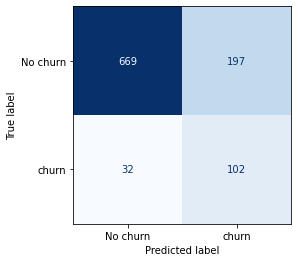

              precision    recall  f1-score   support

    no-churn     0.9544    0.7725    0.8539       866
       churn     0.3411    0.7612    0.4711       134

    accuracy                         0.7710      1000
   macro avg     0.6477    0.7669    0.6625      1000
weighted avg     0.8722    0.7710    0.8026      1000



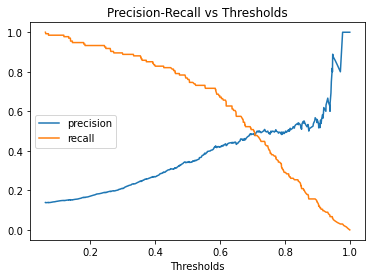

Average precision of logistic regression: 0.456


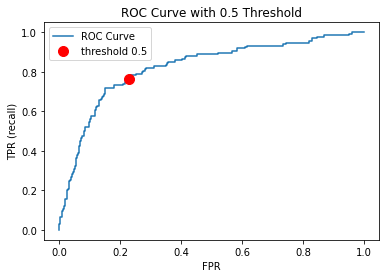

AUC for LogReg: 0.823


In [29]:
# all code below is from lecture 9

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# confusion matrix
pipe_lr = make_pipeline(ct, LogisticRegression(C=0.1, class_weight='balanced'))
pipe_lr.fit(X_train, y_train)

plt.rc('font', size=18)
disp = ConfusionMatrixDisplay.from_estimator(
    pipe_lr,
    X_test,
    y_test,
    display_labels=["No churn", "churn"],
    values_format="d",
    cmap=plt.cm.Blues,
    colorbar=False,
)
plt.show()

# classification report
print(classification_report(y_test, pipe_lr.predict(X_test), target_names=["no-churn", "churn"], digits=4))

# precision-recall curve
precision, recall, thresholds = precision_recall_curve(
    y_test, pipe_lr.predict_proba(X_test)[:, 1]
)
thresholds = np.append(thresholds, 1)

df_PR = pd.DataFrame({"precision": precision, "recall":recall, "thresholds":thresholds}).set_index("thresholds")

ax = df_PR[['precision', 'recall']].plot();
ax.set_title("Precision-Recall vs Thresholds")
ax.set_xlabel("Thresholds")
ax.legend(loc="best")
plt.show()

# average precision score
ap_lr = average_precision_score(y_test, pipe_lr.predict_proba(X_test)[:, 1])
print(f"Average precision of logistic regression: {ap_lr:.3f}")

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pipe_lr.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.title("ROC Curve with 0.5 Threshold")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

default_threshold = np.argmin(np.abs(thresholds - 0.5))

plt.plot(
    fpr[default_threshold],
    tpr[default_threshold],
    "or",
    markersize=10,
    label="threshold 0.5",
)
plt.legend(loc="best")
plt.show()

# AUC
roc_lr = roc_auc_score(y_test, pipe_lr.predict_proba(X_test)[:, 1])
print(f"AUC for LogReg: {roc_lr:.3f}")

<br><br><br><br>

### Exercise 3: Regression metrics <a name="3"></a>
<hr> 


For this exercise, we'll use [California housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) from `sklearn datasets`. The code below loads the dataset.  

In [30]:
from sklearn.datasets import fetch_california_housing

housing_df = fetch_california_housing(as_frame=True).frame

### 3.1: Data spitting and exploration 
rubric={points:4}

**Your tasks:**

1. Split the data into train (80%) and test (20%) splits. 
2. Explore the train split. Do you need to apply any transformations on the data? If yes, create a preprocessor with the appropriate transformations. 
3. Separate `X` and `y` in train and test splits. 

In [31]:
train_df, test_df = train_test_split(housing_df, test_size=0.2, random_state=123)

scaler_features = list(set(train_df.columns) - set(['MedHouseVal']))

ct = make_column_transformer(
    (StandardScaler(), scaler_features)
)

X_train = train_df.drop(columns=["MedHouseVal"])
X_test = test_df.drop(columns=["MedHouseVal"])

y_train = train_df["MedHouseVal"]
y_test = test_df["MedHouseVal"]

<br><br>

### 3.2 Baseline: DummyRegressor 
rubric={points:2}

**Your tasks:**
1. Carry out cross-validation using `DummyRegressor` with default scoring. 
2. What metric is used for scoring by default? 

In [32]:
dummy = DummyRegressor()

scores = cross_validate(dummy, X_train, y_train)
pd.DataFrame(scores).mean()

fit_time      0.001989
score_time    0.000399
test_score   -0.000147
dtype: float64

The metric for scoring is R^2.

<br><br>

### 3.3 Different regressors
rubric={points:8}

In this exercise, we are going to use [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) model which we haven't looked into yet. At this point you should feel comfortable using models with our usual ML workflow even if you don't know the details. We'll talk about `RandomForestRegressor` later in the course.  

The code below defines a custom scorer called `mape_scorer` and creates dictionaries for different regressors (`models`) and different scoring metrics (`score_types_reg`). 

**Your tasks:**

1. Using the `models` and the evaluation metrics `score_types_reg` in the code below, carry out cross-validation with each model, by passing the evaluation metrics to `scoring` argument of `cross_validate`. Use a pipeline with the model as an estimator if you are applying any transformations. 
2. Show results as a dataframe. 
3. Interpret the results. How do the models compare to the baseline? Which model seems to be performing well with different metrics? 


In [33]:
def mape(true, pred):
    return 100.0 * np.mean(np.abs((pred - true) / true))


# make a scorer function that we can pass into cross-validation
mape_scorer = make_scorer(mape, greater_is_better=False)

models = {
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(),
}

score_types_reg = {
    "neg_mean_squared_error": "neg_mean_squared_error",
    "neg_root_mean_squared_error": "neg_root_mean_squared_error",
    "neg_mean_absolute_error": "neg_mean_absolute_error",
    "r2": "r2",
    "mape_scorer": make_scorer(mape, greater_is_better=True),
}

model_data = []
for model in models:
    series = pd.DataFrame(cross_validate(models[model], X_train, y_train, return_train_score=True, scoring=score_types_reg)).mean()
    series = series.reindex(index = ['model'] + list(set(series.index) - set('model')))
    series.at['model'] = model
    model_data.append(series)
pd.DataFrame(model_data)

,model,score_time,test_neg_mean_squared_error,test_neg_mean_absolute_error,fit_time,train_neg_mean_absolute_error,train_mape_scorer,train_neg_root_mean_squared_error,train_r2,test_neg_root_mean_squared_error,train_neg_mean_squared_error,test_mape_scorer,test_r2
0,Ridge,0.003988,-0.683433,-0.535459,0.005585,-0.531403,31.764474,-0.724132,0.606300,-0.810379,-0.524369,31.981032,0.481743
1,Random Forest,0.077796,-0.262823,-0.334521,6.096028,-0.124945,7.054443,-0.192158,0.972273,-0.512536,-0.036928,18.875746,0.802412


Both models perform a lot better than the baseline model. The random forest model is the best model as compared across any metric. The only difference is the time taken to fit and score the model. This makes sense as Ridge is a relatively simple model while random forest is an ensemble of decision trees.

<br><br>

### (Optional) 3.4 Hyperparameter optimization 
rubric={points:1}

**Your tasks:**
1. Carry out hyperparameter optimization using `RandomizedSearchCV` and `Ridge` with the following `param_dist`. The `alpha` hyperparameter of `Ridge` controls the fundamental tradeoff. Choose the metric of your choice for hyperparameter optimization. 
2. Are you getting better scores compared to the default values?

In [34]:
from scipy.stats import loguniform

pipe_r = make_pipeline(ct, Ridge())

param_dist = {"ridge__alpha": loguniform(1e-3, 1e3)}

random_search = RandomizedSearchCV(
    pipe_r, param_distributions=param_dist, n_jobs=-1, n_iter=10, cv=5, random_state=123, scoring=mape_scorer
)

random_search.fit(X_train, y_train)
random_search.best_score_

-31.969228370191622

Negligible, the value here implies we have around $-31.97\%$ error on average which is a slightly lower magnitude compared to the default values: average error of $31.98\%$.

<br><br>

### 3.5 Test results
rubric={points:4}

**Your tasks:**

1. Try the best model on the test set.
2. Briefly comment on the results. (1 to 2 sentences) 

In [35]:
pipe_rf = make_pipeline(ct, RandomForestRegressor())

pipe_rf.fit(X_train, y_train)

mape(pipe_rf.predict(X_test), y_test)

16.12532708479531

Surprisingly, the results are better than the mean cross validation scores from above. This could imply that the training set is representative of the population and that the model is not over-trained.

<br><br>

### 3.6 Model interpretation  
rubric={points:4}

Ridge is a linear model and it learns coefficients associated with each feature during `fit()`. 

**Your tasks:**

1. Visualize coefficients learned by the `Ridge` model above as a pandas dataframe with two columns: features and coefficients. If you attempted 3.4, use the `Ridge` model with best hyperparameters. Otherwise use the `Ridge` model with default hyperparameters. 
2. Increasing which feature values would result in higher housing price? 

In [36]:
pipe_r = make_pipeline(ct, Ridge(alpha=random_search.best_params_['ridge__alpha']))

pipe_r.fit(X_train, y_train)

df = pd.DataFrame(
    data={
        "features": X_train.columns,
        "coefficients": pipe_r.named_steps["ridge"].coef_,
    }
)

df.sort_values("coefficients",ascending=False)

,features,coefficients
4,Population,0.835014
0,MedInc,0.313316
1,HouseAge,0.116855
3,AveBedrms,-0.006809
6,Latitude,-0.041685
7,Longitude,-0.277873
2,AveRooms,-0.840090
5,AveOccup,-0.874863


Increasing the block group population would increase the median value of homes in the block the most.

<br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 